<a href="https://colab.research.google.com/github/Noman-ashraf1/Predicting-Customer-Churn-with-SHAP-LIME-Explanations/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [162]:
df = pd.read_excel("/content/Telco_customer_churn.xlsx")

In [163]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [164]:
df.shape

(7043, 33)

In [165]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [167]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [168]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [169]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [170]:
col_to_keep = [
     'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Tenure Months',
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method',
    'Monthly Charges', 'Total Charges','Churn Value'
]
df = df[col_to_keep]

In [171]:
df.shape

(7043, 20)

In [172]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [173]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [174]:
from sklearn.preprocessing import LabelEncoder
def label_encodeing(df, columns):
  encoders = {}
  for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
  return df, encoders
binary_col = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Paperless Billing']
df, encoders = label_encodeing(df, binary_col)

In [175]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,0,0,1,8,1,2,Fiber optic,0,0,2,0,2,2,Month-to-month,1,Electronic check,99.65,820.5,1
3,0,0,1,1,28,1,2,Fiber optic,0,0,2,2,2,2,Month-to-month,1,Electronic check,104.80,3046.05,1
4,1,0,0,1,49,1,2,Fiber optic,0,2,2,0,2,2,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1


In [176]:
from sklearn.preprocessing import OneHotEncoder
def ohe_encode(df, columns):
  encode = {}
  for col in columns:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = ohe.fit_transform(df[[col]])
    encoded_cols = ohe.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
    df = pd.concat([df.drop(columns=[col]), encoded_df], axis=1)
    encode[col] = ohe
  return df, encode
cat_col = ['Internet Service','Contract','Payment Method']
df, encode = ohe_encode(df, cat_col)

In [177]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,2,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,1,8,1,2,0,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,1,28,1,2,0,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,1,49,1,2,0,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [178]:
df.shape

(7043, 27)

In [179]:
# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # invalid entries become NaN
# Fill missing values (if any)
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())


In [180]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#def scale_data(df):
  #col_name = df.select_dtypes(include=('number')).columns
  #scaler = StandardScaler()
  #df[col_name] = scaler.fit_transform(df[col_name])
 # return df
#df = scale_data(df)

In [181]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,2,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,1,8,1,2,0,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,1,28,1,2,0,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,1,49,1,2,0,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
X = df.drop(columns=['Churn Value'])
Y = df['Churn Value']

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5634, 26), (1409, 26), (5634,), (1409,))

In [184]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [185]:
X_train_resampled.shape, Y_train_resampled.shape

((8330, 26), (8330,))

In [186]:
X_train_resampled.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [187]:
numeric_cols =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on resampled train set
X_train_resampled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])

# Transform test set (do NOT fit again!)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [189]:
from xgboost import XGBClassifier

# You already applied SMOTE, so scale_pos_weight is optional
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_resampled, Y_train_resampled)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:12:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [190]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

print(classification_report(Y_test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1009
           1       0.64      0.61      0.62       400

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8397447968285432


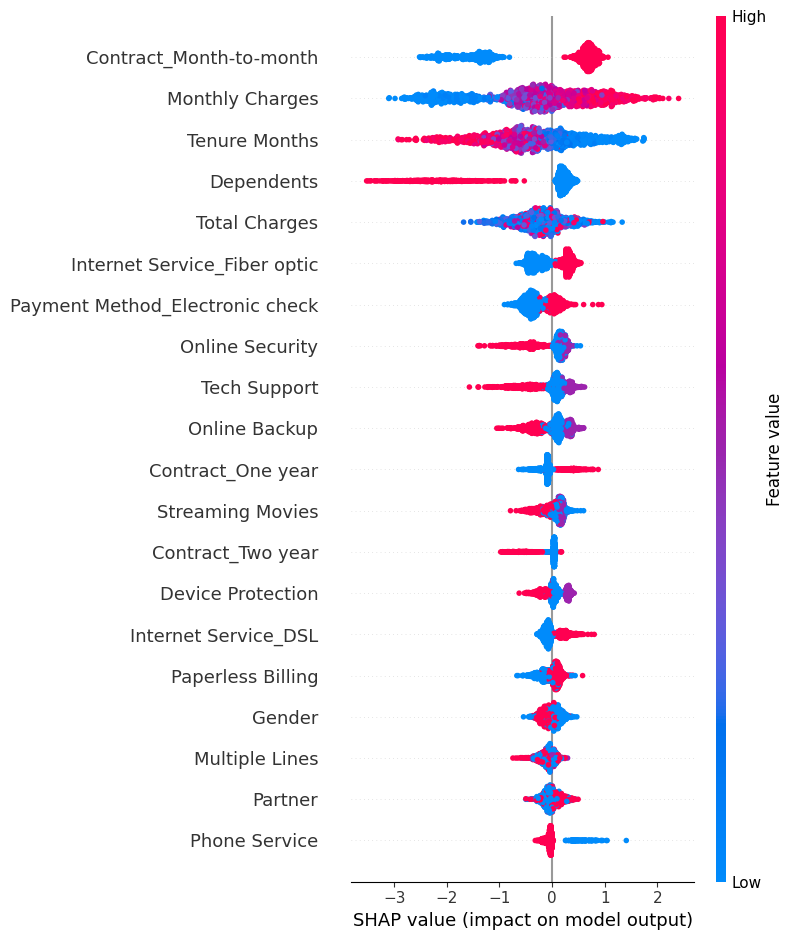

In [191]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test)

# Local explanation for a single customer
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


In [192]:
import joblib
joblib.dump(model, 'model_save.pkl')
joblib.dump(scaler, 'scaler_save.pkl')
joblib.dump(encoders, 'encoder_save.pkl')
joblib.dump(encode, 'encode_save.pkl')

['encode_save.pkl']

In [193]:
model = joblib.load('model_save.pkl')
scaler = joblib.load('scaler_save.pkl')
label_encode = joblib.load('encoder_save.pkl')
hot_encode = joblib.load('encode_save.pkl')

In [204]:
def batch_predict(df_new, label_encode, ohe_encode_dict, scaler, model):
    df = df_new.copy()

    # 1️⃣ Label encode binary columns
    for col, le in label_encode.items():
        if col in df.columns:
            df[col] = df[col].astype(str)
            df[col] = df[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
            if 'Unknown' not in le.classes_:
                le.classes_ = np.append(le.classes_, 'Unknown')
            df[col] = le.transform(df[col])

    # 2️⃣ One-Hot Encode multi-class columns (column-wise)
    for col, ohe in ohe_encode_dict.items():
        if col in df.columns:
            encoded = ohe.transform(df[[col]])
            encoded_cols = ohe.get_feature_names_out([col])
            encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
            df = pd.concat([df.drop(columns=[col]), encoded_df], axis=1)

    # 3️⃣ Scale numeric features
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    df[numeric_cols] = scaler.transform(df[numeric_cols])

    # 4️⃣ Predict
    predictions = model.predict(df)
    probabilities = model.predict_proba(df)[:, 1]

    df_result = df_new.copy()
    df_result['Prediction'] = predictions
    df_result['Probability'] = probabilities

    return df_result


In [214]:
import pandas as pd

# Sample data for 5 customers
sample_data = [
    {
        'Gender': 'Female', 'Senior Citizen': 0, 'Partner': 'Yes', 'Dependents': 'No',
        'Tenure Months': 12, 'Phone Service': 'Yes', 'Multiple Lines': 'No',
        'Online Security': 'Yes', 'Online Backup': 'No', 'Device Protection': 'Yes',
        'Tech Support': 'No', 'Streaming TV': 'Yes', 'Streaming Movies': 'No',
        'Paperless Billing': 'Yes', 'Monthly Charges': 70.5, 'Total Charges': 845.0,
        'Internet Service': 'Fiber optic', 'Contract': 'Month-to-month',
        'Payment Method': 'Electronic check'
    },
    {
        'Gender': 'Male', 'Senior Citizen': 1, 'Partner': 'No', 'Dependents': 'No',
        'Tenure Months': 54, 'Phone Service': 'Yes', 'Multiple Lines': 'Yes',
        'Online Security': 'No', 'Online Backup': 'Yes', 'Device Protection': 'No',
        'Tech Support': 'Yes', 'Streaming TV': 'No', 'Streaming Movies': 'Yes',
        'Paperless Billing': 'No', 'Monthly Charges': 55.3, 'Total Charges': 1327.2,
        'Internet Service': 'DSL', 'Contract': 'One year',
        'Payment Method': 'Bank transfer (automatic)'
    },
    {
        'Gender': 'Female', 'Senior Citizen': 0, 'Partner': 'No', 'Dependents': 'Yes',
        'Tenure Months': 3, 'Phone Service': 'Yes', 'Multiple Lines': 'No',
        'Online Security': 'No', 'Online Backup': 'Yes', 'Device Protection': 'No',
        'Tech Support': 'No', 'Streaming TV': 'Yes', 'Streaming Movies': 'Yes',
        'Paperless Billing': 'Yes', 'Monthly Charges': 90.2, 'Total Charges': 270.6,
        'Internet Service': 'Fiber optic', 'Contract': 'Month-to-month',
        'Payment Method': 'Mailed check'
    },
    {
        'Gender': 'Male', 'Senior Citizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes',
        'Tenure Months': 36, 'Phone Service': 'No', 'Multiple Lines': 'No',
        'Online Security': 'Yes', 'Online Backup': 'Yes', 'Device Protection': 'Yes',
        'Tech Support': 'Yes', 'Streaming TV': 'No', 'Streaming Movies': 'No',
        'Paperless Billing': 'No', 'Monthly Charges': 40.0, 'Total Charges': 1440.0,
        'Internet Service': 'DSL', 'Contract': 'Two year',
        'Payment Method': 'Credit card (automatic)'
    },
    {
        'Gender': 'Female', 'Senior Citizen': 1, 'Partner': 'No', 'Dependents': 'No',
        'Tenure Months': 8, 'Phone Service': 'Yes', 'Multiple Lines': 'No',
        'Online Security': 'No', 'Online Backup': 'No', 'Device Protection': 'No',
        'Tech Support': 'No', 'Streaming TV': 'Yes', 'Streaming Movies': 'No',
        'Paperless Billing': 'Yes', 'Monthly Charges': 60.5, 'Total Charges': 484.0,
        'Internet Service': 'No', 'Contract': 'Month-to-month',
        'Payment Method': 'Electronic check'
    }
]

# Convert to DataFrame
df_sample = pd.DataFrame(sample_data)



In [215]:
df_predictions = batch_predict(df_sample, label_encode, encode, scaler, model)
print(df_predictions)


   Gender  Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0  Female               0     Yes         No             12           Yes   
1    Male               1      No         No             54           Yes   
2  Female               0      No        Yes              3           Yes   
3    Male               0     Yes        Yes             36            No   
4  Female               1      No         No              8           Yes   

  Multiple Lines Online Security Online Backup Device Protection  ...  \
0             No             Yes            No               Yes  ...   
1            Yes              No           Yes                No  ...   
2             No              No           Yes                No  ...   
3             No             Yes           Yes               Yes  ...   
4             No              No            No                No  ...   

  Streaming TV Streaming Movies Paperless Billing Monthly Charges  \
0          Yes               